In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
file_path = '/content/fb_sentiment.csv'
df = pd.read_csv(file_path)


In [3]:
df.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   FBPost      1000 non-null   object
 2   Label       1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [5]:
# Check for missing values in the 'FBPost' column
print("\nMissing values in FBPost column:", df['FBPost'].isnull().sum())



Missing values in FBPost column: 0


In [6]:
# If needed, drop rows with missing 'FBPost' entries
df.dropna(subset=['FBPost'], inplace=True)


In [7]:
# Function to calculate sentiment polarity using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the sentiment based on polarity score
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [8]:
#  Apply the function to the 'FBPost' column to create a new 'Sentiment' column
df['Sentiment'] = df['FBPost'].apply(get_sentiment)


In [9]:
# View the updated DataFrame with sentiment results
print("\nDataset with Sentiment Analysis:\n", df.head())



Dataset with Sentiment Analysis:
    Unnamed: 0                                             FBPost Label  \
0           0  Drug Runners and  a U.S. Senator have somethin...     O   
1           1  Heres a single, to add, to Kindle. Just read t...     O   
2           2  If you tire of Non-Fiction.. Check out http://...     O   
3           3    Ghost of Round Island is supposedly nonfiction.     O   
4           4  Why is Barnes and Nobles version of the Kindle...     N   

  Sentiment  
0   Neutral  
1  Negative  
2   Neutral  
3  Negative  
4   Neutral  


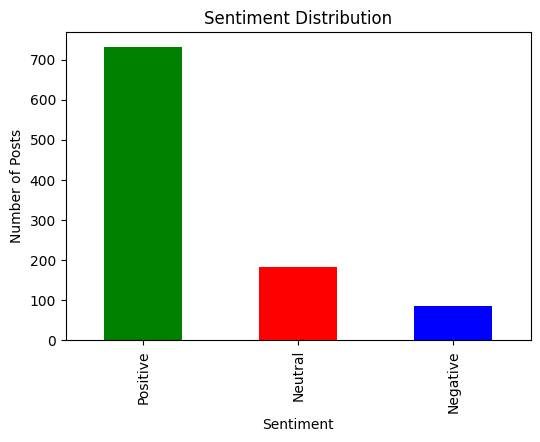

In [10]:
# Plot the sentiment distribution
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

In [12]:
# Save the results to a new CSV file
output_file = '/content/fb_sentiment.csv'
df.to_csv(output_file, index=False)

print(f"Sentiment analysis complete. Results saved to: {output_file}")

Sentiment analysis complete. Results saved to: /content/fb_sentiment.csv


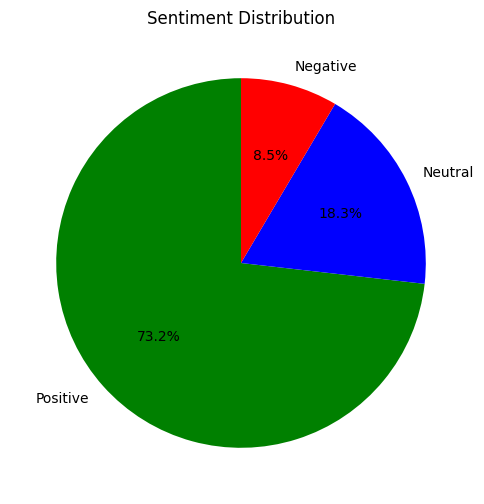

In [13]:
# Sentiment distribution pie chart
plt.figure(figsize=(6, 6))
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.ylabel('')  # Hide y-label
plt.show()


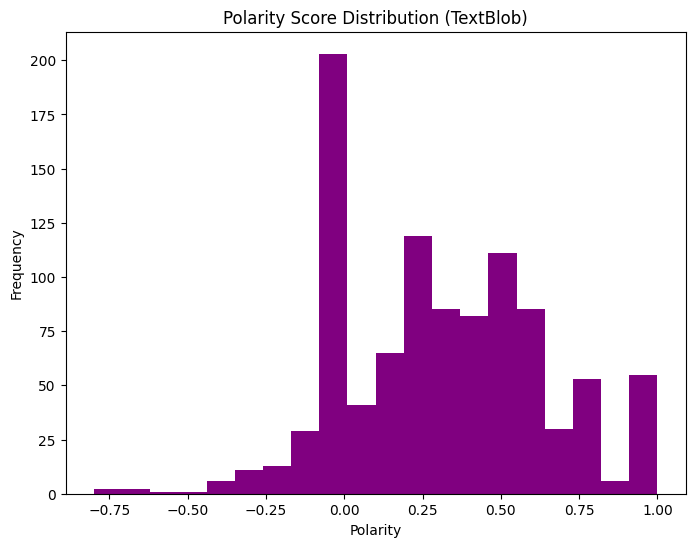

In [14]:
# Use TextBlob to get polarity scores
df['Polarity'] = df['FBPost'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the distribution of polarity scores
plt.figure(figsize=(8, 6))
plt.hist(df['Polarity'], bins=20, color='purple')
plt.title('Polarity Score Distribution (TextBlob)')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (if you haven't already)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment using VADER
def vader_sentiment(text):
    score = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply VADER sentiment analysis on the original FBPost column
df['VADER_Sentiment'] = df['FBPost'].apply(vader_sentiment)

# View the results
print("\nDataset with VADER Sentiment Analysis:\n", df[['FBPost', 'VADER_Sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...



Dataset with VADER Sentiment Analysis:
                                               FBPost VADER_Sentiment
0  Drug Runners and  a U.S. Senator have somethin...        Negative
1  Heres a single, to add, to Kindle. Just read t...        Negative
2  If you tire of Non-Fiction.. Check out http://...         Neutral
3    Ghost of Round Island is supposedly nonfiction.        Negative
4  Why is Barnes and Nobles version of the Kindle...         Neutral


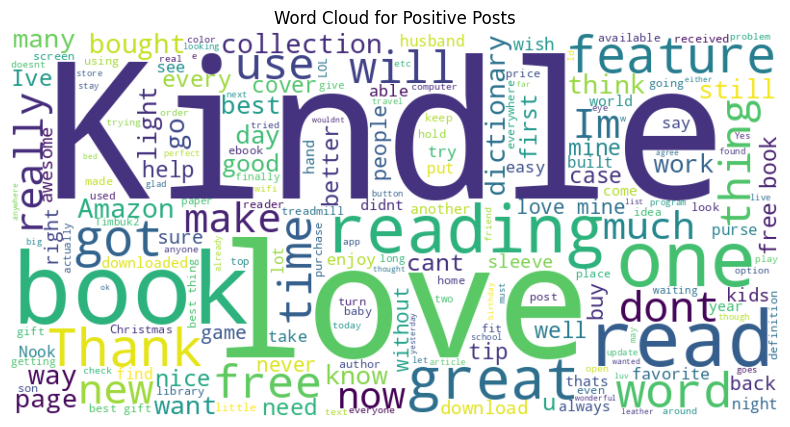

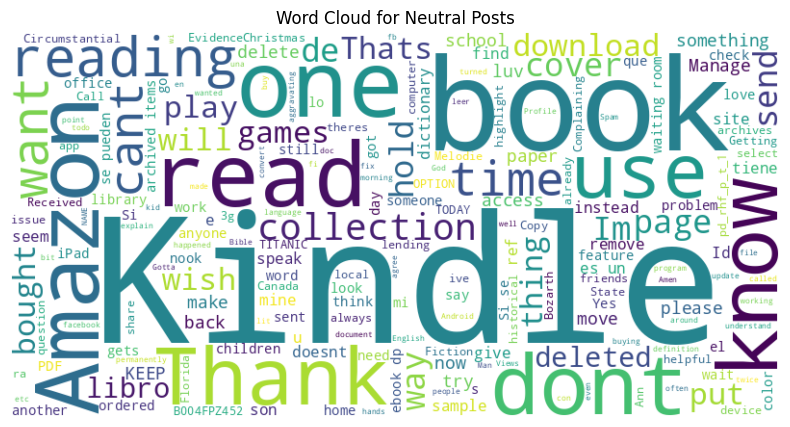

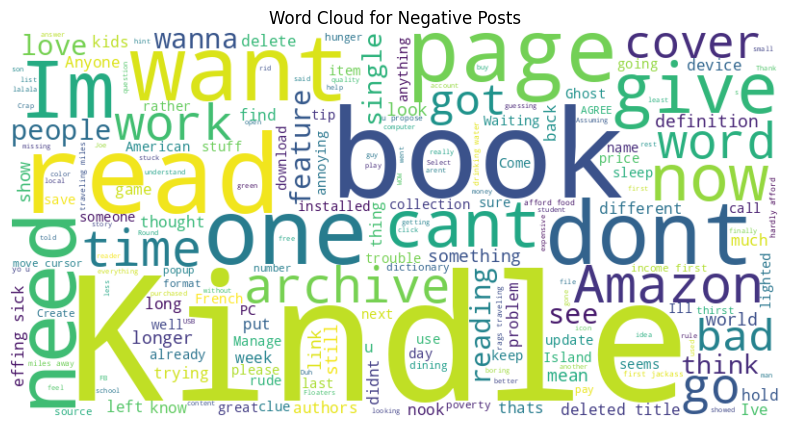

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for each sentiment
def generate_wordcloud(sentiment, sentiment_col='Sentiment'):
    posts = df[df[sentiment_col] == sentiment]['FBPost'].values
    combined_text = ' '.join(posts)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Posts')
    plt.show()

# Generate word clouds for Positive, Neutral, and Negative posts
generate_wordcloud('Positive')
generate_wordcloud('Neutral')
generate_wordcloud('Negative')
